In [38]:
# FINDING FREQUENCY
import math

# Given values
L = 60e-6       # Henries
V = 15           # Volts
I = 1          # Amperes


# Calculate frequency
numerator = V / I
denominator = 2 * math.pi * L
f = numerator / denominator

# Display the result
print(f"Frequency f = {f:.2f} Hz")
print(f"Which is {f / 1e3:.2f} kHz")

Frequency f = 39788.74 Hz
Which is 39.79 kHz


In [39]:
# FINDING TX COMPENSATION C_TX
import math

# Given values
f_kHz = 39.79  # Frequency in kHz
L = 60e-6      # Inductance in Henries

# Convert frequency to Hz
f = f_kHz * 1e3

# Calculate capacitance
C = 1 / ((2 * math.pi * f) ** 2 * L)

# Display results in Farads and microfarads
print(f"Capacitance C = {C:.2e} F")
print(f"Which is {C * 1e6:.2f} µF (microfarads)")

Capacitance C = 2.67e-07 F
Which is 0.27 µF (microfarads)


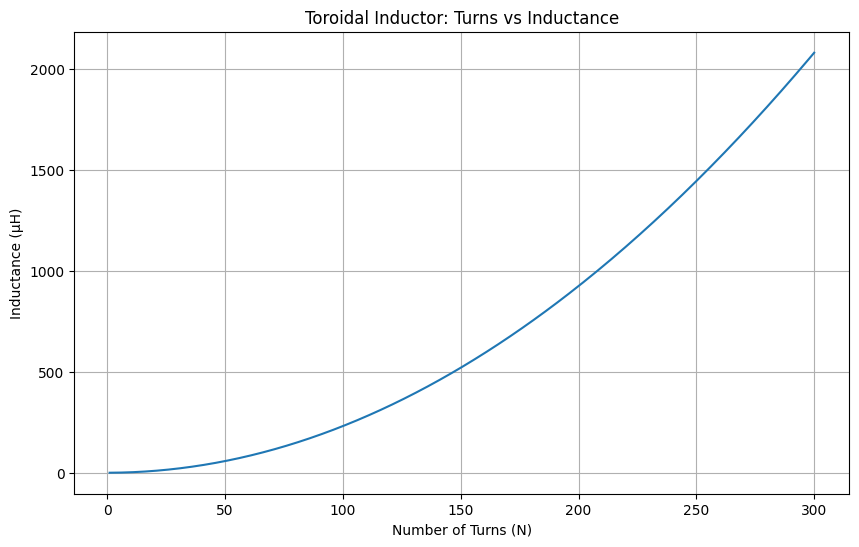


Inductance Values at 50-Turn Intervals:
Turns (N)  Inductance (H)      
------------------------------
50         5.783e-05
100        2.313e-04
150        5.205e-04
200        9.253e-04
250        1.446e-03
300        2.082e-03
r_mean =  0.055
core radius =  0.045000000000000005


In [ ]:
# FINDING L_RX GIVEN N_RX FOR MAX R_RX_O = 10 CM
import math
import matplotlib.pyplot as plt

# Constants and parameters
mu0 = 4 * math.pi * 1e-7  # Permeability of free space (H/m)
Nmax = 300                 # Maximum number of turns
r_outer = 0.10            # 10 cm in meters
r_inner = 0.01            # 1 cm in meters

# Calculate geometric properties
r_mean = (r_outer + r_inner) / 2
core_radius = (r_outer - r_inner) / 2
A = math.pi * (core_radius ** 2)  # Cross-sectional area
l = 2 * math.pi * r_mean          # Magnetic path length

# Initialize lists for plotting
N_values = []
L_values = []

# Calculate inductance for all N values
for N in range(1, Nmax + 1):
    L = (N ** 2 * mu0 * A) / l
    N_values.append(N)
    L_values.append(L)  # Store in Henries

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, [L * 1e6 for L in L_values])  # Convert to µH for plotting
plt.title('Toroidal Inductor: Turns vs Inductance')
plt.xlabel('Number of Turns (N)')
plt.ylabel('Inductance (µH)')
plt.grid(True)
plt.show()

# Print summary table
print("\nInductance Values at 50-Turn Intervals:")
print(f"{'Turns (N)':<10} {'Inductance (H)':<20}")
print("-" * 30)
for N in range(0, Nmax + 1, 50):
    if N == 0:  # Handle N=0 specially
        continue
    L = (N ** 2 * mu0 * A) / l
    print(f"{N:<10} {L:.3e}")


print("r_mean = ",r_mean)
print("core radius = ",core_radius)

In [2]:
# FINDING TX COMPENSATION C_RX
import math

# Given values
f_kHz = 39.79   # Frequency in kHz
L = 220e-6      # Inductance in Henries

# Convert frequency to Hz
f = f_kHz * 1e3

# Calculate capacitance
C = 1 / ((2 * math.pi * f) ** 2 * L)

# Display results in Farads and microfarads
print(f"Capacitance C = {C:.2e} F")
print(f"Which is {C * 1e6:.2f} µF (microfarads)")

Capacitance C = 7.27e-08 F
Which is 0.07 µF (microfarads)


In [41]:
# FINDING L-NETWORK PARAMETERS
import math

# Given parameters
f_Hz = 39.79e3  # Frequency in Hz (15.21 kHz)
R_L = 6.69e6        # Load resistance in Ohms (1 MegaOhm)
R_1 = 1          # Series resistance in Ohms (1 Ohm)

# Calculate Q factor
Q = math.sqrt(R_L / R_1 - 1)

# Calculate L_series in Henries
L_series = (Q * R_1) / (2 * math.pi * f_Hz)

# Calculate C_parallel in Farads
C_parallel = 1 / (2 * math.pi * f_Hz * (R_L / Q))

# Convert to more practical units
L_series_mH = L_series * 1e3        # milliHenries
C_parallel_nF = C_parallel * 1e9    # nanoFarads

# Print results
print(f"Q factor: {Q:.4f}")
print(f"Series Inductance: {L_series:.6f} H ({L_series_mH:.3f} mH)")
print(f"Parallel Capacitance: {C_parallel:.2e} F ({C_parallel_nF:.3f} nF)")

Q factor: 2586.5032
Series Inductance: 0.010346 H (10.346 mH)
Parallel Capacitance: 1.55e-09 F (1.546 nF)


In [3]:
import math

# Constants and given values
mu0 = 4 * math.pi * 1e-7       # Permeability of free space (H/m)
R_Tx = 0.675                    # Transmitter coil radius (meters)
N_Rx = 300                      # Receiver turns
N_Tx = 4                        # Transmitter turns
R_Rx = 0.055                    # Receiver coil radius (converted from 9 cm to meters)
y = 2.7                         # Separation distance (meters)
L_TX = 60e-6                   # Transmitter inductance (converted from 314 μH to H)
L_RX = 220e-6                 # Receiver inductance (already in henries)

# Calculate mutual inductance (M)
numerator = mu0 * (R_Tx**2) * N_Rx * N_Tx * math.pi * (R_Rx**2)
denominator = 2 * ((R_Tx**2 + y**2) ** 1.5)  # (3/2) power = 1.5
M = numerator / denominator

# Calculate coupling coefficient (k)
sqrt_inductance_product = math.sqrt(L_TX * L_RX)
k = M / sqrt_inductance_product

# Format output with scientific notation
print(f"Mutual Inductance (M): {M:.3e} H")
print(f"Coupling Coefficient (k): {k:.3e}")
print(f"k ≈ {k:.5f}")  # Alternative decimal format

Mutual Inductance (M): 1.514e-07 H
Coupling Coefficient (k): 1.318e-03
k ≈ 0.00132


Computed Rx capacitance for resonance: C_Rx = 7.2789e-08 F

Distance (m)  M (H)        k         V_L (V)     I_L (A)     P_L (W)
----------------------------------------------------------------------
  0.00        1.4826e-05    0.1291   1.8534e+00  2.7703e-07  5.1344e-07
  0.50        7.6928e-06    0.0670   9.6163e-01  1.4374e-07  1.3823e-07
  1.00        2.5964e-06    0.0226   3.2456e-01  4.8514e-08  1.5746e-08
  1.50        1.0246e-06    0.0089   1.2808e-01  1.9144e-08  2.4519e-09
  2.00        4.8482e-07    0.0042   6.0605e-02  9.0590e-09  5.4902e-10
  2.50        2.6259e-07    0.0023   3.2825e-02  4.9066e-09  1.6106e-10


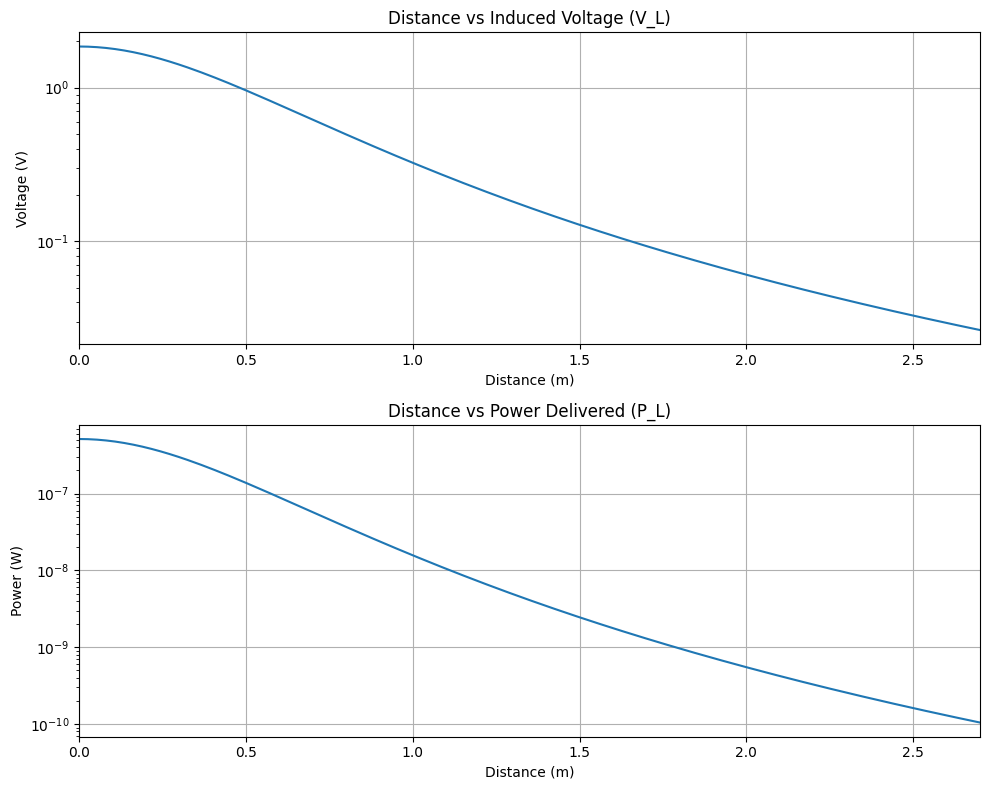

In [4]:
# Load voltage, current and power, without compensation.
import numpy as np
import matplotlib.pyplot as plt

# Constants and Tx parameters
d_mu0 = 4e-7 * np.pi          # Permeability of free space (H/m)
R_Tx = 0.675                  # Transmitter coil radius (m)
I_Tx = 1.0                    # Transmitter current (A)
R_L = 6.69e6                  # Load resistance (Ω)
N_Tx = 4                      # Number of transmitter turns
L_Tx = 60e-6                  # Tx inductance in H

# Rx parameters
L_Rx = 219.8e-6               # Rx inductance (H)
N_Rx = 300                    # Number of Rx turns
R_Rx = 0.065                  # Rx coil radius (m)
f_r = 39.79e3                 # Resonance frequency (Hz)

# Derived Rx capacitance for resonance
omega = 2 * np.pi * f_r
C_Rx = 1 / (omega**2 * L_Rx)
print(f"Computed Rx capacitance for resonance: C_Rx = {C_Rx:.4e} F")

# Distance array for table and plots
distances = np.arange(0, 2.7 + 0.0001, 0.5)
y = np.linspace(0, 2.7, 200)

# Pre-compute areas and constants
dA_Rx = np.pi * R_Rx**2

# Table header
print("\nDistance (m)  M (H)        k         V_L (V)     I_L (A)     P_L (W)")
print("----------------------------------------------------------------------")

# Compute and print values for table distances
for d in distances:
    M = (d_mu0 * R_Tx**2 * N_Rx * N_Tx * dA_Rx) / (2 * (R_Tx**2 + d**2)**1.5)
    k = M / np.sqrt(L_Tx * L_Rx)
    V_L = (omega * M * I_Tx) / 2
    I_L = V_L / R_L
    P_L = V_L**2 / R_L
    print(f"{d:>6.2f}        {M:>10.4e}  {k:>8.4f}   {V_L:>10.4e}  {I_L:>10.4e}  {P_L:>10.4e}")

# Plotting curves up to 2.7 m
plt.figure(figsize=(10, 8))

# Induced voltage vs distance
M_y = (d_mu0 * R_Tx**2 * N_Rx * N_Tx * dA_Rx) / (2 * (R_Tx**2 + y**2)**1.5)
V_y = (omega * M_y * I_Tx) / 2
P_y = V_y**2 / R_L

plt.subplot(2, 1, 1)
plt.semilogy(y, np.abs(V_y))
plt.title('Distance vs Induced Voltage (V_L)')
plt.xlabel('Distance (m)')
plt.ylabel('Voltage (V)')
plt.xlim(0, 2.7)
plt.grid(True)

# Power delivered vs distance
plt.subplot(2, 1, 2)
plt.semilogy(y, np.abs(P_y))
plt.title('Distance vs Power Delivered (P_L)')
plt.xlabel('Distance (m)')
plt.ylabel('Power (W)')
plt.xlim(0, 2.7)
plt.grid(True)

plt.tight_layout()
plt.show()


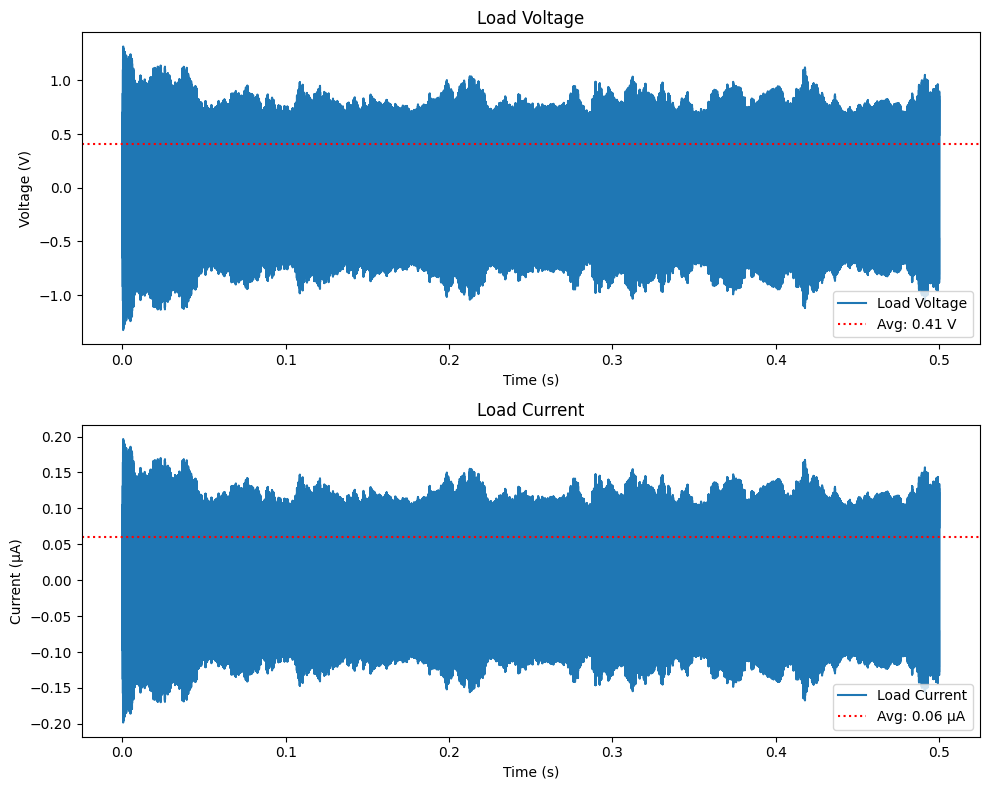

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from file
times = []
voltages = []
currents = []

with open('Draft3.txt', 'r') as file:
    header = file.readline().strip().split('\t')  # Read header
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) == 3:
            times.append(float(parts[0]))
            voltages.append(float(parts[1]))
            currents.append(float(parts[2]))

# Compute absolute average values based on all data points
avg_voltage = np.mean(np.abs(voltages))
avg_current = np.mean(np.abs(currents))

# Convert current to microamperes
currents_microA = [i * 1e6 for i in currents]
avg_current_microA = avg_current * 1e6

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Voltage vs. Time
ax1.plot(times, voltages, label="Load Voltage")
ax1.axhline(avg_voltage, color='red', linestyle='dotted', label=f'Avg: {avg_voltage:.2f} V')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('Load Voltage')
ax1.legend()

# Current vs. Time (in microA)
ax2.plot(times, currents_microA, label="Load Current")
ax2.axhline(avg_current_microA, color='red', linestyle='dotted', label=f'Avg: {avg_current_microA:.2f} µA')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Current (µA)')
ax2.set_title('Load Current')
ax2.legend()

plt.tight_layout()
plt.show()


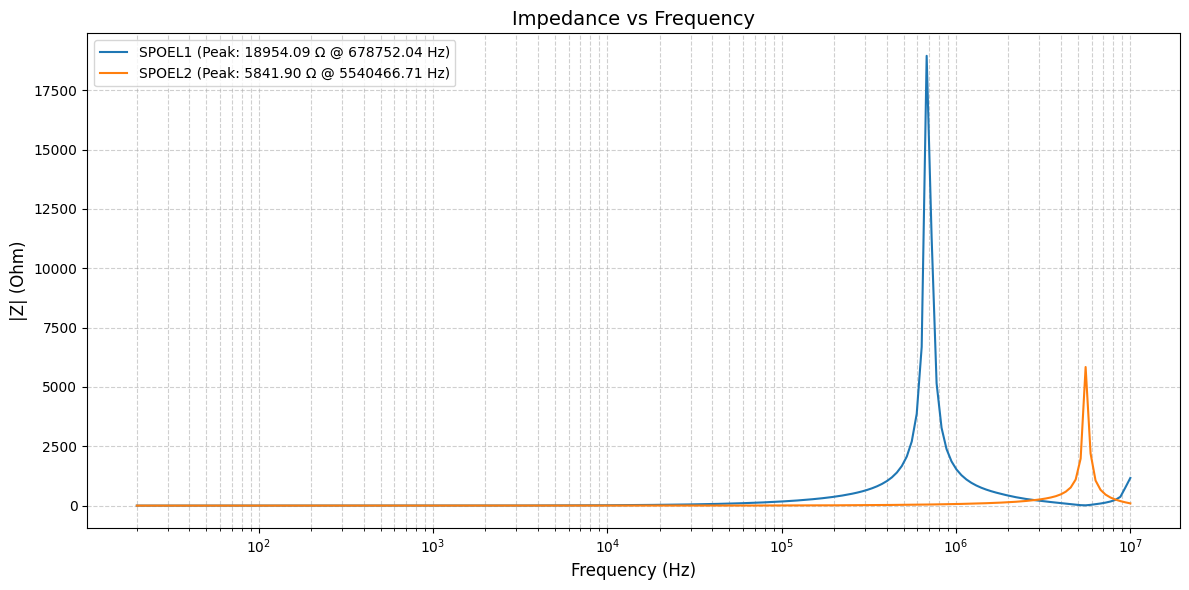

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def read_impedance_data(filename):
    """Reads impedance data from Keysight CSV file"""
    frequencies = []
    impedance = []
    read_data = False

    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()

            if line.startswith('BEGIN CH1_DATA'):
                read_data = True
                next(f)  # Skip header line
                continue

            if read_data and line and not line.startswith('!'):
                parts = line.split(',')
                if len(parts) == 2:
                    try:
                        freq = float(parts[0])
                        z = float(parts[1])
                        frequencies.append(freq)
                        impedance.append(z)
                    except ValueError:
                        continue

    return np.array(frequencies), np.array(impedance)

# Read data from both files
freq1, z1 = read_impedance_data('SPOEL1.CSV')
freq2, z2 = read_impedance_data('SPOEL2.CSV')

# Find peak values
peak_idx1 = np.argmax(z1)
peak_idx2 = np.argmax(z2)

peak_freq1, peak_z1 = freq1[peak_idx1], z1[peak_idx1]
peak_freq2, peak_z2 = freq2[peak_idx2], z2[peak_idx2]

# Create plot
plt.figure(figsize=(12, 6))
plt.semilogx(freq1, z1, label=f'SPOEL1 (Peak: {peak_z1:.2f} Ω @ {peak_freq1:.2f} Hz)')
plt.semilogx(freq2, z2, label=f'SPOEL2 (Peak: {peak_z2:.2f} Ω @ {peak_freq2:.2f} Hz)')

# Formatting
plt.title('Impedance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('|Z| (Ohm)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()
